In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

path = 'https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/boston_houses.csv'


In [3]:
df = pd.read_csv(path)
df = df.rename(columns={"MEDV":"Price"})
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [14]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [16]:
# define numeric and categorical columns
num_col = df.describe().columns.tolist()
all_col = df.columns.tolist()
obj_col = [i for i in all_col if i not in num_col]

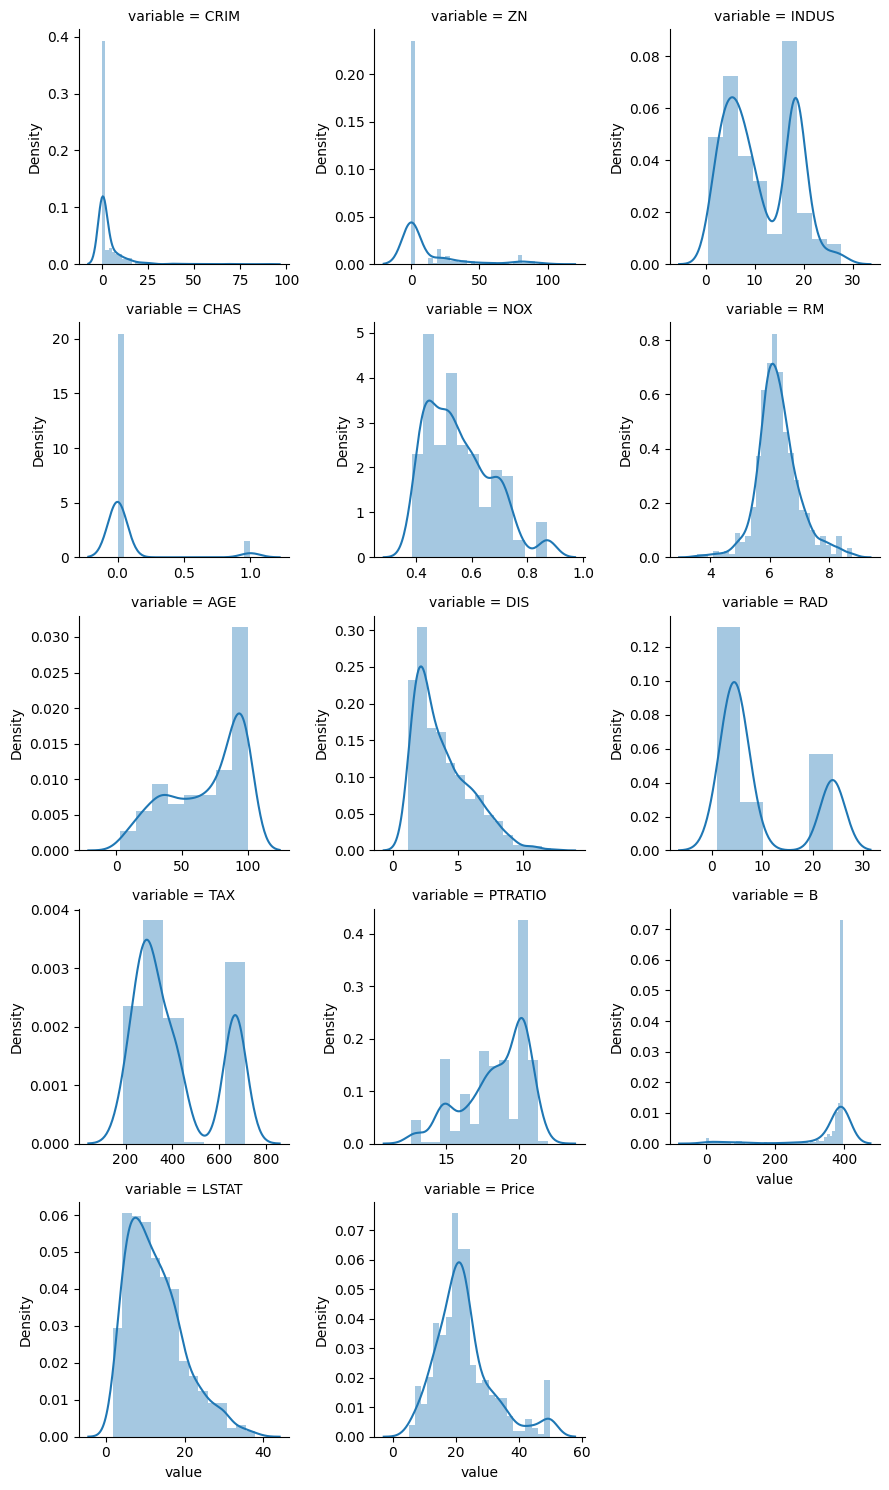

In [17]:
def viz(df,types):
    num = df
    f = pd.melt(num, value_vars=num)
    g = sns.FacetGrid(f, col="variable",  col_wrap=3,
                      sharex=False, sharey=False)
    g = g.map(types, "value")
    plt.show()
    return (g)
# histogram visualization
viz(df[num_col], sns.distplot)

In [19]:
!pip install jupyter-summarytools -q

from summarytools import dfSummary
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,CRIM[float64],Mean (sd) : 3.6 (8.6)min < med < max:0.0 < 0.3 < 89.0IQR (CV) : 3.6 (0.4),504 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACBUlEQVR4nO3XwW7aQBRG4TuF0AEqG0RrdmzZdcGSh+jD5iG85T2QDLKFY8cITXfdVC2xHSv5k/Otmcssjsa6LoRgwHv35a0vALzE+N4PnHNTM5t0nN+EEKqOZ4E//huqc266Wq1+RVG07DK8KIqzc+6RWNHXvRd1EkXRcr/fV3Ec120G53nu0zRdZlk2MTNCRS93P/1mZnEc10mSPHWYP+1wBvgLyxQkECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokjIccfrvdHswscs51HdGEEKpXvBJEDRZqWZYP1+v152azGY1Go7rLjKIozs65R2LFYKE2TTP23s92u129Xq/Pbc/nee7TNF1mWTYxM0L95Ab99JuZzefzOkmSp47Hp696GchimYKEwV/UPnouYyxiH8i7DbXvMsYi9rG8KNQ8z33bwZfLxZuZlWXpj8fjrO350+n0zXs/2263brFYPLc5W1XV18Ph8CPLsu/OuaLtf+NNPIcQ/vkg/QZ/9H9FrqlyrQAAAABJRU5ErkJggg=="">",0(0.0%)
2,ZN[float64],Mean (sd) : 11.4 (23.3)min < med < max:0.0 < 0.0 < 100.0IQR (CV) : 12.5 (0.5),26 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACtklEQVR4nO3YP2/aQBjH8ef4V5O65yAqsrF0yFCpQ0YvfQd9sVm7dSBSt2Rnj6KQYATBxXLcKVWlSiE+B8Ev/X5mnuNkvtjyuaqqDDh0rX1vAHiJzrYPOOf6ZtYLXH9TVdU6cBb449lQnXP94XD4zXs/CFl8sVjcO+fOiRVNbbuj9rz3gzRN10mS5HUWzrIsmkwmg9ls1jMzQkUjWx/9ZmZJkuSj0eghYP1+wAzwD16mIIFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIaGz7w08xznXN7Ne4Pimqqr1a+4H+3OwoTrn+sPh8Jv3fhAyv1gs7p1z58T6NhxsqGbW894P0jRdJ0mS1xnMsiyaTCaD2WzWMzNCfQMOOVQzM0uSJB+NRg8Bo/1X3wz2hpcpSCBUSDj4R3+osiy7Zuadc6FL/HenBg1PWcx2eM12GmrDWPzj42M3ZHC1WnWLovgyHo/b7Xa71ovYk/l8vnTOfTezkHm5yJuespjt9prtLNSmsRRFEZVl+TnP8x9mVutlarPZdKIoOjo7O8tPTk7u63739fX1h4uLi6/j8fhjyN4b/mAtM3sMmGs67+M4HqVpuqh7ymLW/JptO058UahZlkV1v/ju7i6Ooujo9PTUHR8f/6o7f3t7G02n06Msy97f3Nxs6swul8va+/1bURSd0L3P5/P48vIy6Acry7K7Wq0+xXE8bbVaRb1dN5t/ujEURfHTAv5gTa7Zer1+d3V19exx4m+QwfBRWCqPkwAAAABJRU5ErkJggg=="">",0(0.0%)
3,INDUS[float64],Mean (sd) : 11.1 (6.9)min < med < max:0.5 < 9.7 < 27.7IQR (CV) : 12.9 (1.6),76 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC1klEQVR4nO3dsW7aQBjA8e8KgQsgG4REtqwMlTpk5CH6sH2EDDxBViY2FEBGoaGAoVMqVQ0B39nNfcf/tx+xdH9ZtnNnm+PxKEDovnz2AQCXqH/2AeBvxphbEWl4/MT2eDy+lnU8oSDUgBhjbvv9/vckSXquv7FarZbGmB+xxUqoYWkkSdIbjUavaZpuig7OssyOx+PefD5viAiholppmm4Gg8FPx+G3pR5MILiZggqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoEPTqKc9FxFEuIL5WwYbqu4g41gXE16rSUD3PiEmn0xmMRqNV0UXEMS8gvlaVhep7RtztdjbP86/NZvPRcRFxlAuIr1WVZ1SvbRXT6bT39PTU2u/3tSoODrpUfo3quq1iuVxyRsQfPJ6CCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUKFswunPfY9JYfD4cZhHPCPD0P12ff0tudps9k8iojrhxMAETl/RnXe98SeJ5Tpoj1TLvue2POEMnEzBRWCfVMK3OR5fiMiiTHGZXiwr0GKNlTPCRMJeNJOWa/XN7vd7tv9/X2tVqsVfpdCyK9BijJU3wkTCXvSTtlut3Vrbevh4WFzd3e3LDI29NcgRRmqz4SJhD9p57TbbddvqQZ7AxxlqG88Jkwk4Em7Rtz1QwVChQqEChUIFSoQKlQgVKhAqFCBUKFC1A/8fcS6uEMrQn1HzIs7tCLUd8S8uEMrQv1AjIs7tCJUlKbKb9cSKkpR9bdrCRVlcd6xfMl1PaGiVK5fapQz1/WEWgGPZ7C8XeYEQi2ZzzNY3i5z2kWhZllmi/7wy8uLFRFZr9d2Npu1/uf4z/zbi8WiY61tDYdD0+12fxUZ+/z8bCeTSSvLsvZsNtsWGSvid9xZltk8z+vi/t+45HA41F1auWTMbx/bcEmt0Jy1AAAAAElFTkSuQmCC"">",0(0.0%)
4,CHAS[int64],Mean (sd) : 0.1 (0.3)min < med < max:0.0 < 0.0 < 1.0IQR (CV) : 0.0 (0.3),2 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1A

In [20]:
corrmat = df.corr(numeric_only=True)
corrmat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


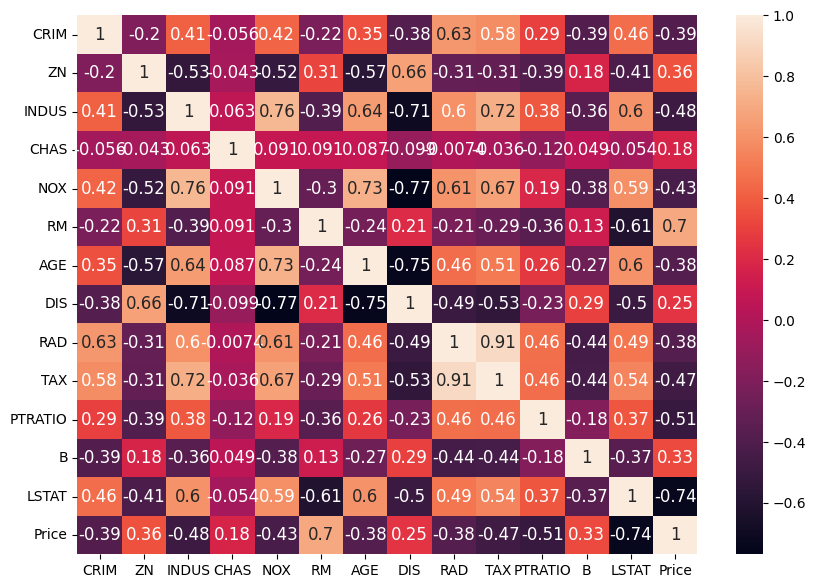

In [23]:
plt.figure(figsize = (10, 7))
sns.heatmap(corrmat, annot = True, annot_kws={'size': 12});

In [5]:
#STEP 0 FILTERING
#remove features not useful
features_to_remove = []
df_clean = df.drop(features_to_remove, axis=1)

In [6]:
# STEP 1 - TRAIN TEST SPLITTING
#Feature matrix and target vector
X_ = df_clean.drop(['Price'], axis=1) # matrice Features
y = df_clean['Price']                #Target

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
standardized_data = sc.fit_transform(X_)

X = standardized_data

In [8]:
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [9]:
regressors =   [XGBRegressor(),
                SVR(),
                ElasticNet(),
                KNeighborsRegressor(),
                LinearRegression(),
                GradientBoostingRegressor(),
                RandomForestRegressor(),
                DecisionTreeRegressor(),
                ]

In [10]:
# Split the dataset into 70% Training and 30% Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=667
                                                    )

In [11]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

metrics_dict = {'ModelName': [], 'R2Score': [], 'RMSE': [], 'MSE': [], 'MAE': []}

# Loop through each regressor
for reg in regressors:
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    model_name = type(reg).__name__
    metrics_dict['ModelName'].append(model_name)
    metrics_dict['R2Score'].append(r2_score(y_test, y_pred))
    metrics_dict['RMSE'].append(mean_squared_error(y_test, y_pred, squared=False))
    metrics_dict['MSE'].append(mean_squared_error(y_test, y_pred))
    metrics_dict['MAE'].append(mean_absolute_error(y_test, y_pred))

# Create DataFrame
metrics_df = pd.DataFrame(metrics_dict).set_index('ModelName').sort_values('R2Score', ascending=False)
metrics_df

,R2Score,RMSE,MSE,MAE
ModelName,,,,
GradientBoostingRegressor,0.825664,3.932870,15.467467,2.381280
XGBRegressor,0.790329,4.313065,18.602527,2.484267
RandomForestRegressor,0.777075,4.447299,19.778467,2.532007
KNeighborsRegressor,0.646575,5.599703,31.356668,3.101053
LinearRegression,0.611310,5.872437,34.485514,3.683772
DecisionTreeRegressor,0.568891,6.184579,38.249013,3.607237
SVR,0.539636,6.390973,40.844541,3.396214
ElasticNet,0.524630,6.494302,42.175964,4.063458


#### ## Fine Tune Model with CrossValidation and GridSearch


In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Create the parameter grid based on the results of random search
param_grid = {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.01, 0.1, 0.5],
            'max_depth': [3, 5, 7],
            'min_samples_split': [2, 5, 10]
            }

gbr = GradientBoostingRegressor(random_state=667)
grid_search_gbr = GridSearchCV(estimator=gbr,
                               param_grid=param_grid,
                               cv=5,
                               n_jobs=-1,
                               verbose=2)

In [34]:
# Fit the grid search to the data
grid_search_gbr.fit(X_train, y_train)
grid_search_gbr.best_params_

Fitting 5 folds for each of 81 candidates, totalling 405 fits


{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

In [ ]:
## Put these parameters inside the final Pipeline!!
# learning_rate=0.1,
# max_depth=3,
# min_samples_split=10,
# n_estimators=100

RFE, o Recursive Feature Elimination, è una tecnica utilizzata nell'apprendimento automatico per la selezione delle caratteristiche (features) più rilevanti per un modello predittivo. In pratica, RFE funziona nel seguente modo:

Si inizia con un modello di apprendimento automatico (come regressione logistica o un albero decisionale) e si addestra su tutte le caratteristiche disponibili nel dataset.
Viene valutata l'importanza di ogni caratteristica utilizzando un criterio specifico (ad esempio, il coefficiente della regressione logistica o l'importanza delle caratteristiche di un albero decisionale).
Le caratteristiche meno importanti vengono eliminate dal set di dati.
Il modello viene quindi ri-addestrato sul set di dati ridotto e il processo viene ripetuto fino a quando non viene raggiunto un criterio di terminazione (ad esempio, un numero specifico di caratteristiche rimanenti).

In [35]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
rfe = RFE(estimator=gbr)
rfe.fit(X, y)

selected_features_indices = rfe.get_support(indices=True)

# Ottieni i nomi delle caratteristiche selezionate dal DataFrame
selected_features_names = df.columns[selected_features_indices]

features = []
for name in selected_features_names:
    features.append(name)
features

Feature selezionate:


['CRIM', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT']